<center><h1>Laboratorio 1</h1></center>
<center><h2>Tema: Series temporales</h2></center>
<br>

## Consignas
1. Levantar los datos desde el archivo dataset/Telefonia_movil.csv. Los mismos fueron extraídos de http://datosabiertos.enacom.gob.ar/visualizations/29890/trafico-de-suscriptores-de-telefonia-movil-miles-de-minutos/
2. Explorar los datos, visualizarlos
3. Implementar dos modelos (como ser Random Walk (Naïve) y Exponential Smoothing)
4. Visualizar los resultados y evaluarlos, comparando ambas implementaciones

## Ejecución
La ejecución de este notebook se realizó en Colab.




---

## 1. Importar datos y librerías

In [0]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [0]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [0]:
plt.rcParams['figure.figsize'] = [15, 10]

In [4]:
import sys
IN_COLAB = 'google.colab' in sys.modules
DATA_FILE = 'datasets/Telefonia_movil.csv'
RAW_REPO = 'https://raw.githubusercontent.com/DiploDatos/AnalisisSeriesTemporales/master/'
if IN_COLAB:
    DATA_FILE = RAW_REPO + DATA_FILE
    !wget -O plotting.py {RAW_REPO + 'plotting.py'}

data = pd.read_csv(DATA_FILE)

--2019-10-04 16:24:19--  https://raw.githubusercontent.com/DiploDatos/AnalisisSeriesTemporales/master/plotting.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3315 (3.2K) [text/plain]
Saving to: ‘plotting.py’

plotting.py         100%[===================>]   3.24K  --.-KB/s    in 0s      

2019-10-04 16:24:19 (51.4 MB/s) - ‘plotting.py’ saved [3315/3315]



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
Año                                   25 non-null int64
Trimestre                             25 non-null int64
Minutos pospago salientes (miles)     25 non-null object
Minutos prepago salientes (miles)     25 non-null int64
Total de minutos salientes (miles)    25 non-null int64
Periodo                               25 non-null object
dtypes: int64(4), object(2)
memory usage: 1.2+ KB


In [6]:
data.head()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8.785.943,6582117,15368060,Ene-Mar 2013
1,2013,2,9.512.689,7108640,16621329,Abr-Jun 2013
2,2013,3,10.315.484,7335154,17650638,Jul-Sept 2013
3,2013,4,9.809.515,6250549,16060064,Oct-Dic 2013
4,2014,1,10.128.751,5799223,15927974,Ene-Mar 2013


Se acomodan los datos de las columnas Año y Trimestre para formar una nueva con el periodo.


In [7]:
data['Date'] = pd.to_datetime(data.apply(lambda row: str(row['Año']) + 'Q' + str(row['Trimestre']),axis=1))
data = data.set_index('Date')
data.head()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
Date,,,,,,
2013-01-01,2013,1,8.785.943,6582117,15368060,Ene-Mar 2013
2013-04-01,2013,2,9.512.689,7108640,16621329,Abr-Jun 2013
2013-07-01,2013,3,10.315.484,7335154,17650638,Jul-Sept 2013
2013-10-01,2013,4,9.809.515,6250549,16060064,Oct-Dic 2013
2014-01-01,2014,1,10.128.751,5799223,15927974,Ene-Mar 2013


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2013-01-01 to 2019-01-01
Data columns (total 6 columns):
Año                                   25 non-null int64
Trimestre                             25 non-null int64
Minutos pospago salientes (miles)     25 non-null object
Minutos prepago salientes (miles)     25 non-null int64
Total de minutos salientes (miles)    25 non-null int64
Periodo                               25 non-null object
dtypes: int64(4), object(2)
memory usage: 1.4+ KB


Se eliminan las columnas de fechas que no se utilizarán.

In [9]:
data = data.drop(['Periodo','Año','Trimestre'],axis=1)
data.head()

,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
Date,,,
2013-01-01,8.785.943,6582117,15368060
2013-04-01,9.512.689,7108640,16621329
2013-07-01,10.315.484,7335154,17650638
2013-10-01,9.809.515,6250549,16060064
2014-01-01,10.128.751,5799223,15927974


Se convierte a periodo el índice.

In [10]:
data.index=data.index.to_period(freq='Q')
data.tail()

,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
Date,,,
2018Q1,13.423.580,5850985,19274565
2018Q2,14.240.217,6027374,20267591
2018Q3,14.574.305,6108477,20682782
2018Q4,14.915.060,6613685,21528745
2019Q1,13.937.271,6427084,20364355


Se define como la variable a analizar, la columna **Total de minutos salientes**

In [0]:
y=data['Total de minutos salientes (miles)']

## 2. Explorar y visualizar los datos

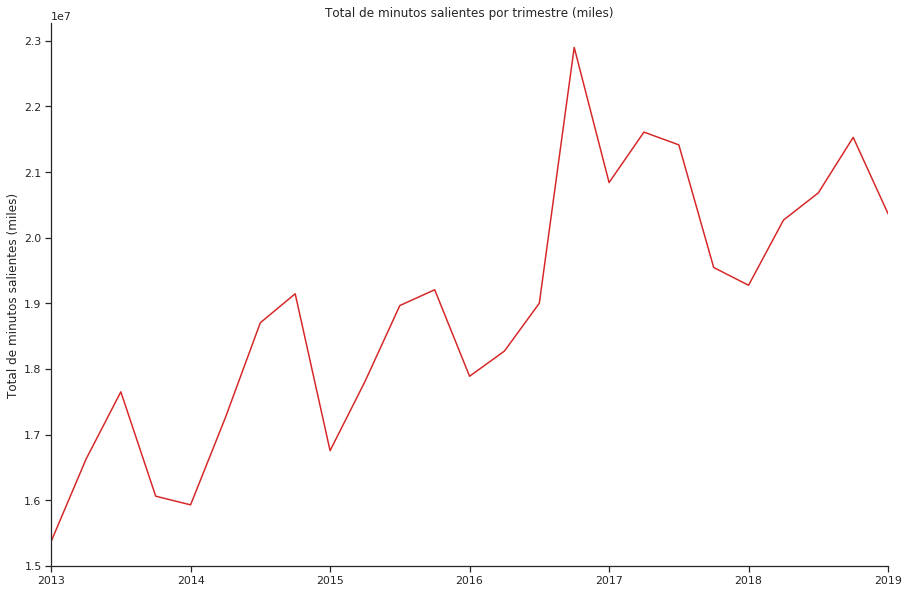

In [12]:
fig, ax= plt.subplots()
y.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Total de minutos salientes (miles)')
ax.set_title('Total de minutos salientes por trimestre (miles)')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

In [13]:
y.describe().round(2)

count          25.00
mean     18922204.72
std       1982378.31
min      15368060.00
25%      17650638.00
50%      19001229.00
75%      20364355.00
max      22899656.00
Name: Total de minutos salientes (miles), dtype: float64

## 3. Implementar dos modelos (como ser Random Walk (Naïve) y Exponential Smoothing)

### 3.1 Random walk



In [0]:
h = 2
test=pd.period_range(start=y.index[-1]+1, periods=h, freq='Q')
pred=pd.Series(np.repeat(y.iloc[-1], h), index=test)

### 3.2 Exponential smoothing

In [15]:
model_es = sm.tsa.SimpleExpSmoothing(y).fit()
fitted_es = model_es.fittedvalues
model_es.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,SimpleExpSmoothing,SSE,43441867557448.141
Optimized:,True,AIC,708.589
Trend:,None,BIC,711.027
Seasonal:,None,AICC,710.589
Seasonal Periods:,None,Date:,"Fri, 04 Oct 2019"
Box-Cox:,False,Time:,16:24:22
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5492677,alpha,True
initial_level,1.5952e+07,l.0,True


## 4. Visualizar los resultados y evaluarlos, comparando ambas implementaciones

#### Intervalos de predicción para Naïve

In [16]:
resid_rw=y-y.shift(1)
sigma_rw = resid_rw.std()
round(sigma_rw,3)

1409600.295

In [17]:
intv = pd.concat([pred-stats.norm.ppf(0.975)*sigma_rw*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.975)*sigma_rw*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2019Q2,1.760159e+07,2.312712e+07
2019Q3,1.645721e+07,2.427150e+07


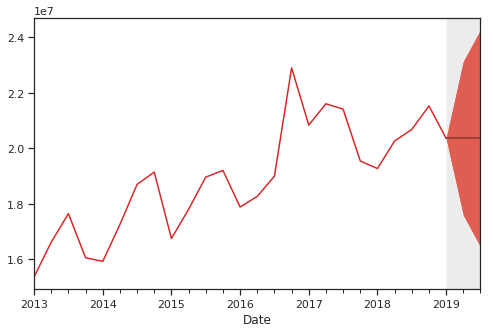

In [18]:
from plotting import fanchart

point_pred = (intv[0]+intv[1])/2

fig, ax = fanchart(y,point_pred,intv,intv,intv)

plt.show()

In [20]:
mse_es = sm.tools.eval_measures.mse(y,fitted_es)
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_es))

 In-sample fit:
 MSE               1737674702297.925


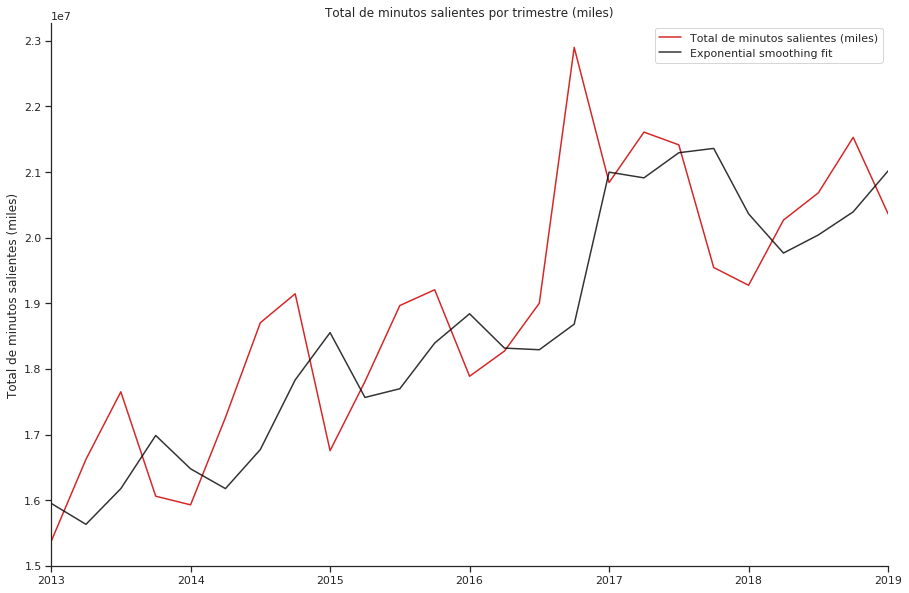

In [21]:
fig, ax= plt.subplots()
y.plot(color=red, label='Total de minutos salientes (miles)')
fitted_es.plot(color='black', label='Exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Total de minutos salientes (miles)')
ax.set_title('Total de minutos salientes por trimestre (miles)')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

### Comparación de residuos

In [0]:
resid_es=y-fitted_es

The following cells compute the diagnostics. We find that the residuals are uncorrelated, have non-constant variance (due to higher volatitility in the 80s), and are non-Gaussian. 

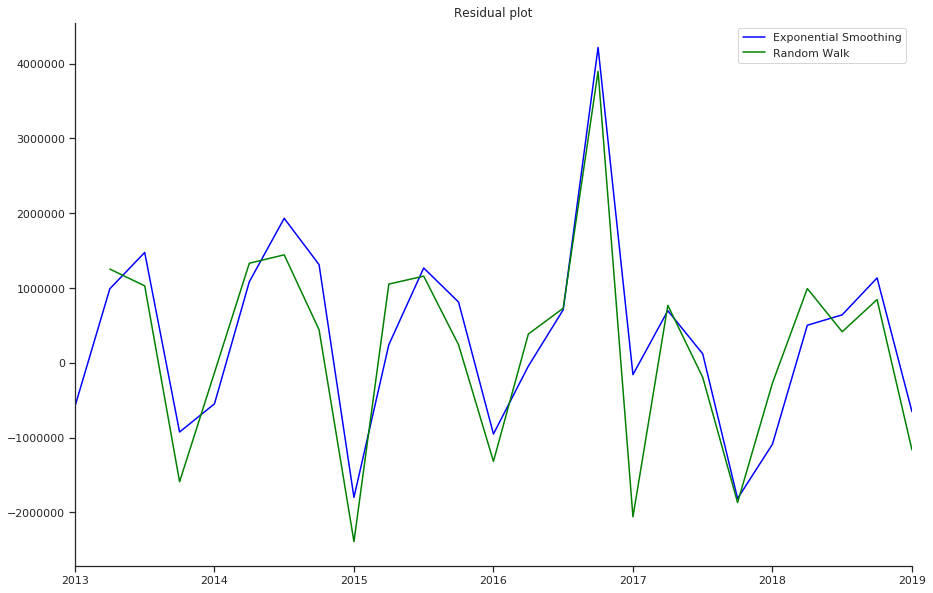

In [23]:
fig, ax= plt.subplots()
resid_es.plot(color='blue',label='Exponential Smoothing')
resid_rw.plot(color='green', label='Random Walk')
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

### Distribución de residuos

In [0]:
def hist(series):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

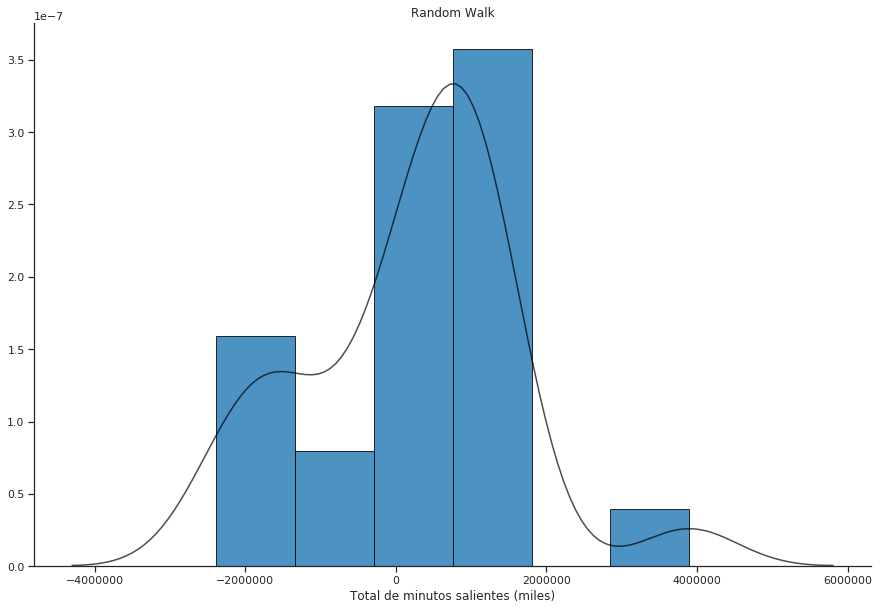

In [25]:
hist(resid_rw.dropna())
plt.title('Random Walk')
plt.show()

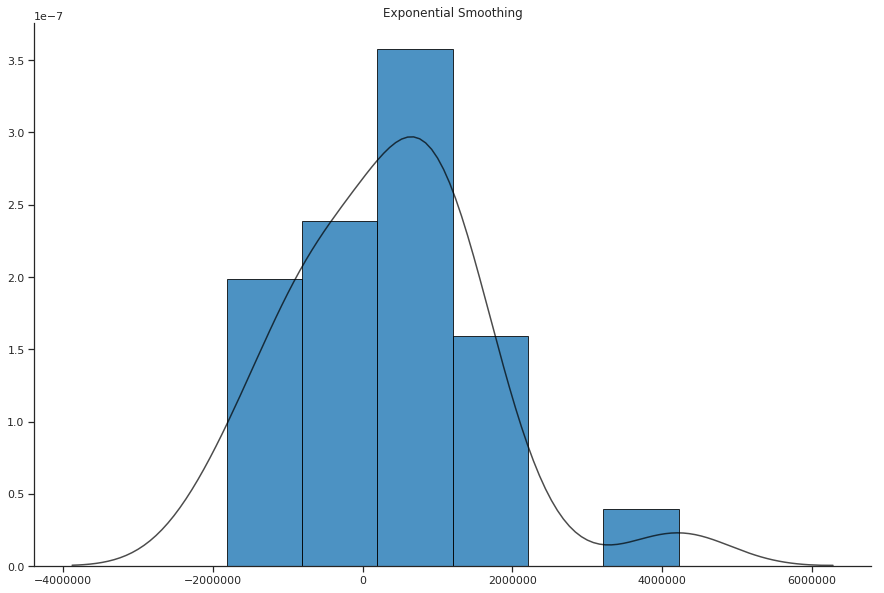

In [26]:
hist(resid_es)
plt.title('Exponential Smoothing')
plt.show()

De los dos modelos, Exponential Smoothing es el que presenta una distribución más parecida a una gaussiana.

### Validación de modelos

In [27]:
start_val = y.index[-round(len(y)/12*.25)*12]
start_val

Period('2016Q2', 'Q-DEC')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


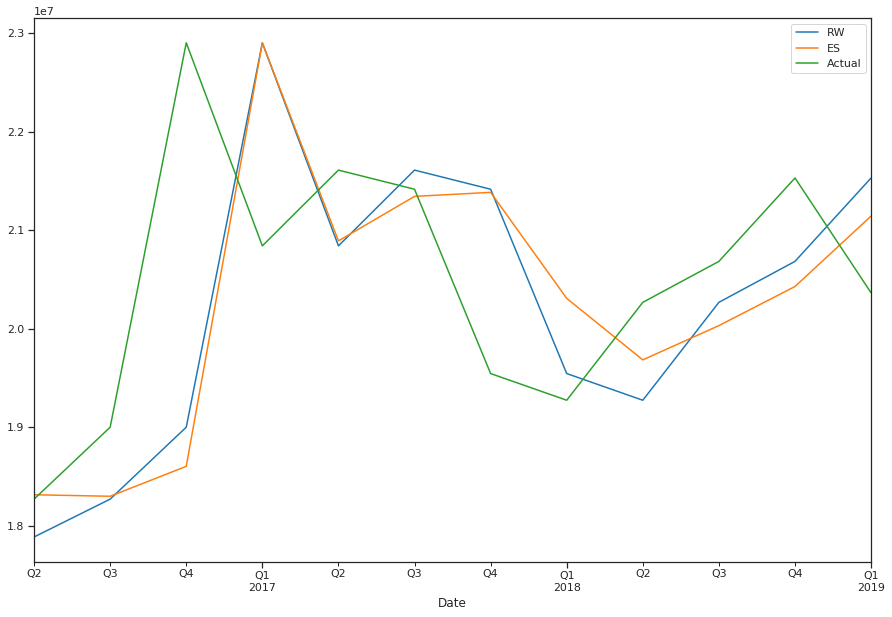

In [28]:
validation=y[start_val:].index
start = y.index.get_loc(start_val)

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # ES forecast

columns=['RW', 'ES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)
results_sm.plot();

In [29]:
from scipy import stats

table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
RW,1515052.221,452546.846
ES,1600318.330,478827.309


Ambos modelos tienen una baja performance, como se pudo observar en el gráfico anterior, pero en base a los errores RMSE y SE, el mejor de los dos es Random Walk.